#Customer Churn Analysis and Prediction

In [529]:
# import  the all Libarys
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report,roc_curve,auc,accuracy_score,mean_absolute_error


Data loading

In [530]:
# import the data set with help of dataframe
df=pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")

In [531]:
# show the data set
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [532]:
# information  for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [533]:
# show the shape of dataset
df.shape

(7043, 21)

statistical analysis

In [534]:

df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [535]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [536]:
df["Churn"].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [537]:
df["PaymentMethod"].value_counts(normalize=True)*100

PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

In [538]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [539]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

 Data Cleaning

In [540]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [541]:
df.drop_duplicates(keep='first',inplace=True)

In [542]:
df.drop(columns="customerID",inplace=True)

#Data visualization

In [543]:
sns.histplot(x="Churn",data=df,hue="gender")
plt.show()

In [544]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod",data=df,hue="PaperlessBilling",palette='dark:y')
plt.show()

In [545]:
sns.pairplot(data=df,kind="scatter")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [546]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

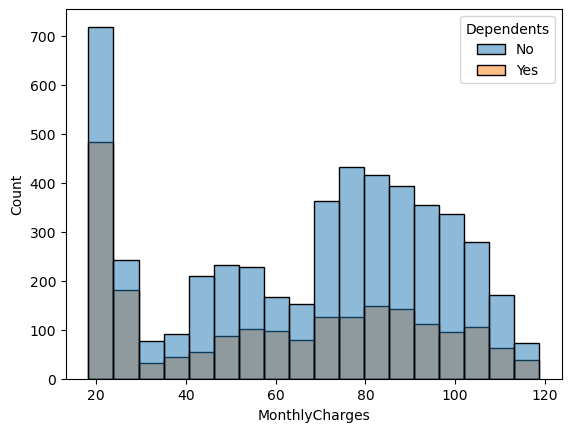

In [547]:
sns.histplot(x="MonthlyCharges",hue="Dependents",data=df)
plt.show()

In [569]:
plt.figure(figsize=(5,5))
sns.boxplot(x="TotalCharges",data=df)
plt.show()

#Data Replace 

In [549]:
df.replace("Yes",1,inplace=True)# yes converted into 1
df.replace("No",0,inplace=True) # No converted into 0

C:\Users\vrooo\AppData\Local\Temp\ipykernel_13856\4108490972.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("No",0,inplace=True) # No converted into 0


#Dataset splitting.


In [550]:
# splite the Data set from of X and y
x=df.drop(columns="Churn",axis=1)
y=df["Churn"]

In [551]:
# Traning And Testing  Data Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [552]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')


In [553]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

In [554]:
#Using the Decision treee Model
dt=DecisionTreeClassifier(max_depth=19)

In [555]:
# model fit
dt.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=19)

In [556]:
# score for  train
dt.score(x_train,y_train)*100

71.7962371317004

In [557]:
# Score for testing dataset
dt.score(x_train,y_train)*100

71.7962371317004

In [558]:
# prediction the X_test
y_prd=dt.predict(x_test)

In [559]:
# this function use for over come the overlapping
for i in range(1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_test,y_test)
    print(dt2.fit(x_test,y_test),dt2.score(x_test,y_test),i)


DecisionTreeClassifier(max_depth=1) 0.7352732434350603 1
DecisionTreeClassifier(max_depth=2) 0.8005677785663591 2
DecisionTreeClassifier(max_depth=3) 0.8005677785663591 3
DecisionTreeClassifier(max_depth=4) 0.8190205819730305 4
DecisionTreeClassifier(max_depth=5) 0.8268275372604684 5
DecisionTreeClassifier(max_depth=6) 0.8545067423704755 6
DecisionTreeClassifier(max_depth=7) 0.872959545777147 7
DecisionTreeClassifier(max_depth=8) 0.8921220723917672 8
DecisionTreeClassifier(max_depth=9) 0.915542938254081 9
DecisionTreeClassifier(max_depth=10) 0.9325762952448545 10
DecisionTreeClassifier(max_depth=11) 0.9488999290276792 11
DecisionTreeClassifier(max_depth=12) 0.9638041163946061 12
DecisionTreeClassifier(max_depth=13) 0.9765791341376863 13
DecisionTreeClassifier(max_depth=14) 0.9829666430092264 14
DecisionTreeClassifier(max_depth=15) 0.9914833215046132 15
DecisionTreeClassifier(max_depth=16) 0.9950319375443577 16
DecisionTreeClassifier(max_depth=17) 0.9971611071682044 17
DecisionTreeClass

In [560]:
# show the tree graph with accuracy

from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()

In [561]:
# using the confusion matric find the churn value 
cf=confusion_matrix(y_test,dt.predict(x_test))
precision_score(y_test,dt.predict(x_test))*100
recall_score(y_test,dt.predict(x_test))*100
f1_score(y_test,dt.predict(x_test))*100

99.5973154362416

In [562]:
# This function use for  confusion matrix report
cr=classification_report(y_test,y_prd)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      0.99      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [563]:
# show the confusion matrix with help of heat map
sns.heatmap(cf,annot=True,cmap="viridis")
plt.show()

In [564]:
# Get predicted probabilities
y_prob = dt.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])  # Random guess line
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(' ROC_Curve')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [565]:
# using the feature imporytant function for import value in the data set
ft = pd.Series(dt.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=ft.values, y=ft.index)
plt.title("Feature_Importance")
plt.xlabel("Importance_score")
plt.ylabel("Features")
plt.show()


In [566]:
# check the accuracy and data losses 
mse=mean_absolute_error(y_test,y_prd)
print(mse*100)

0.21291696238466998


In [567]:
# accuracy check for data set
accuracy_score=dt.score(x_test,y_test)*100
print(accuracy_score)

99.78708303761533


#Predication Customer Churn

In [568]:
# this program use for  predication model
input_data=(0,0,0,1,0,1,0,2,6,0,1,0,0,0,0,6,1,3,29.85)
input_data_array=np.asarray(input_data)
input_reshape=input_data_array.reshape(1,-1)
prediction=dt.predict(input_reshape)
print(f"Customer Churn is prediction {prediction}")



Customer Churn is prediction [1]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Summary

Your Jupyter Notebook is focused on Customer Churn Analysis and Prediction using a dataset named Telco_Customer_Churn.csv. It includes:

Libraries: Pandas, NumPy, Seaborn, Matplotlib, and Scikit-learn for data analysis and machine learning.

Data Processing: Loading and exploring the dataset.

Modeling: Decision Tree Classifier.

Evaluation Metrics: Accuracy, F1-score, Precision, Recall, ROC Curve.